In [17]:
import sys
import os
import nltk
import re
import unicodedata
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# DataScience Challenge 5
# _Quel language parlent les protéines ?_
![protein](prot_struct.png "Protein")

## Les proteines
Elles sont constituées des 20 acides aminés suivants:

|Nom    | lettre|   |Nom    | lettre|
|:------|------:|---|:------|------:|
| Alanine | A   | ░ | Leucine | L   |
| Arginine | R   | ░ | Lysine | K   |
| Asparagine | N   | ░ | Methionine | M   |
| Acide Aspartique | D   | ░ | Phenylalanine | F   |
| Cysteine | C   | ░ | Proline | P   |
| Acide Glutamique | E   | ░ | Serine | S   |
| Glutamine | Q   | ░ | Threonine | T   |
| Glycine | G   | ░ | Tryptophane | W   |
| Histidine | H   | ░ | Tyrosine | Y   |
| Isoleucine | I   | ░ | Valine | V   |

In [6]:
# Acides aminés
amino_acids = ['a','r','n','d','c','e','q','g','h','i','l','k','m','f','p','s','t','w','y','v']

# Les protéines
fastaList = []
for line in open("uniprot-proteome.fasta"):
    li = line.strip()
    if not li.startswith(">"):
        fastaList.append(line.lower())

fastaList[:3]

['maaaaaqgggggeprrtegvgpgvpgevemvkgqpfdvgprytqlqyigegaygmvssay\n',
 'dhvrktrvaikkispfehqtycqrtlreiqillrfrhenvigirdilrastleamrdvyi\n',
 'vqdlmetdlykllksqqlsndhicyflyqilrglkyihsanvlhrdlkpsnllinttcdl\n']

## Les dictionnaires
Des textes dans différents languages ont été téléchargés sur [project Gutenberg](https://www.gutenberg.org/). On va les utiliser pour constituer des dictionnaires.

In [46]:
def parse_dictionnaries(dictionnaries_folder):
    filenames = os.listdir(dictionnaries_folder)
    #create a dict of all languages
    languages_index = dict()
    languages_dict = dict()
    for i,filename in enumerate(filenames):
        l = filename.split('.')[0]
        languages_index[i] = l
        
        #open text
        with open(os.path.relpath(os.path.join(dictionnaries_folder, filename)))  as f:
            data = f.read()
        
        #normalize text
        ascii_data = unicodedata.normalize('NFKD',unicode(data,"utf-8")).strip().encode('ASCII','ignore')
        
        #tokenize
        re_tok = nltk.tokenize.RegexpTokenizer(r"\w+")
        punct_tokens = re_tok.tokenize(ascii_data)
        
        #lower case and exclude numbers
        lower_tokens = [w.lower() for w in punct_tokens if w.isalpha() ]
        
        #unique set of words
        set_words = list(sorted(set(lower_tokens)))
        
        #filter on size
        sel_set_words = [w for w in set_words if (len(w) > 2)]
        
        #store the list of words in its dict entry
        languages_dict[l] = sel_set_words
        
    return languages_index, languages_dict

In [12]:
with open('dictionnaries.json','r') as fb:
    data = json.load(fb)

In [16]:
#Quels languages ? 
print sorted(data.keys())

[u'afrikaans', u'arapaho', u'breton', u'calo', u'catalan', u'cebuano', u'czech', u'danish', u'dutch', u'english', u'esperanto', u'estonian', u'finnish', u'french', u'frisian', u'friulian', u'gaelic', u'galician', u'german', u'hugarian', u'icelandic', u'interlingua', u'inuktitut', u'irish', u'italian', u'kashubian', u'latin', u'lloko', u'maori', u'mayan', u'north-american-indian', u'norwegian', u'occitan', u'polish', u'portugese', u'romanian', u'sanskrit', u'slovenian', u'spanish', u'swedish', u'tagalog', u'welsh']


In [47]:
# Combien de langues?
print len(data.keys())

42


## Quel language contient le plus de mots formés par des aa ?

In [26]:
# On compte les mots qui ne contiennent pas d'autres lettres que des acides aminés
[x not in amino_acids for x in 'aaa']

[False, False, False]

In [27]:
[x not in amino_acids for x in 'bbb']

[True, True, True]

In [31]:
# Le décompte du nombre de lettres non aa est stocké dans une liste
nb_non_aa_par_mots = []
nb_non_aa_par_mots.append(np.sum([x not in amino_acids for x in 'aaa']))
nb_non_aa_par_mots.append(np.sum([x not in amino_acids for x in 'bbb']))
nb_non_aa_par_mots.append(np.sum([x not in amino_acids for x in 'ccc']))

nb_non_aa_par_mots

[0, 3, 0]

In [32]:
# On compte le nombre de zéros pour obtenir le nombre de mots constitués d'aa
nb_non_aa_par_mots.count(0)

2

In [33]:
count_aa_words = []
freq_aa_words = []
list_lang = []
for k,v in data.items():
    aa_words = []
    for word in v:
        aa_words.append(np.sum([x not in amino_acids for x in word]))
    count_aa_words.append(aa_words.count(0))
    freq_aa_words.append(aa_words.count(0)/float(len(aa_words)))
    list_lang.append(k)
    
df_aa_words = pd.DataFrame({'lang': list_lang, 'nb_aa_words': count_aa_words, 'freq_aa_words': freq_aa_words})
df_aa_words.sort_values('freq_aa_words', inplace=True)
df_aa_words.head()

,freq_aa_words,lang,nb_aa_words
22,0.103357,kashubian,157
3,0.126133,inuktitut,974
23,0.146909,arapaho,777
8,0.198036,polish,484
7,0.220677,spanish,4888


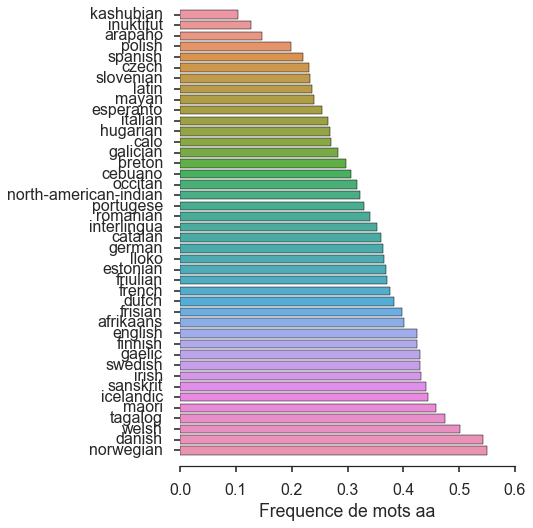

In [43]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
ax = sns.barplot(x="freq_aa_words", y="lang", data=df_aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
ax.set(xlabel="Frequence de mots aa",ylabel="")
plt.show()

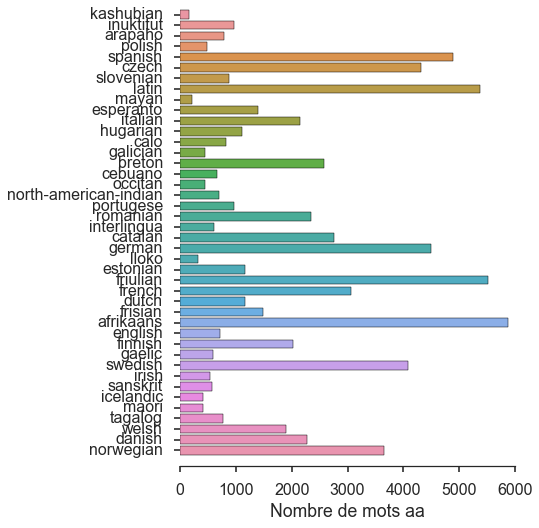

In [49]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
ax = sns.barplot(x="nb_aa_words", y="lang", data=df_aa_words)
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
ax.set(xlabel="Nombre de mots aa",ylabel="")
plt.show()

## Combien de mots dans les séquences de protéines ?

In [50]:
# Collecte des mots aa
aa_word_data = dict()
for k,v in data.items():
    collecting_list = []
    for word in v:
        # Si le mot ne contient pas d'autres lettres que des aa
        if np.sum([x not in amino_acids for x in word]) == 0:
            # Alors on conserve le mot
            collecting_list.append(word)
    aa_word_data[k] = collecting_list

In [51]:
aa_word_data['french'][:3]

[u'academie', u'accaparer', u'accent']

In [53]:
# liste des langues
languages = df_aa_words.lang.tolist()
# nombre maximun de mots
max_dict_len = 0
for k,v in aa_word_data.iteritems():
    if len(v)>max_dict_len:
        max_dict_len = len(v)
# matrice des langues x mots
aa_words_matrix = np.zeros((len(languages),max_dict_len), dtype=int)

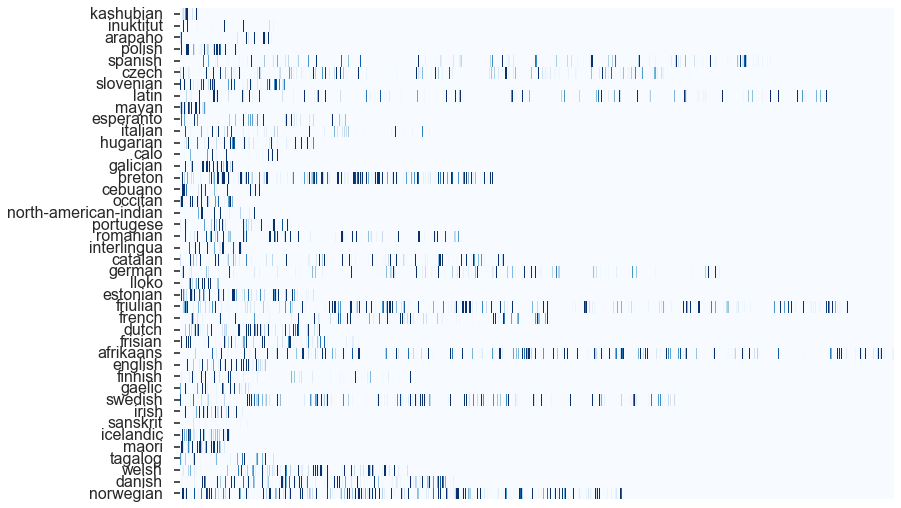

In [56]:
aa_words_matrix = np.load("aa_words_matrix.npy" )
words_df = pd.DataFrame(aa_words_matrix, index=languages)
sns.heatmap(words_df, square=False, xticklabels=False, robust=True, cbar=False, cmap="Blues")
plt.show()

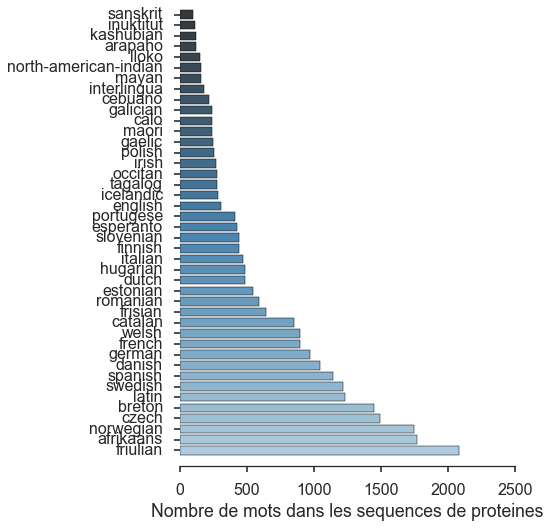

In [59]:
# Décompte des occurences de mots dans les protéines
count_df = words_df.apply(np.count_nonzero, axis=1)
count_df.sort_values(inplace=True)
#plot
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context('poster')
plt.figure(figsize=(6,8))
ax = sns.barplot(count_df, count_df.index, palette="Blues_d")
sns.despine(top=True, right=True, left=True, offset=10, trim=True)
ax.set(xlabel="Nombre de mots dans les sequences de proteines", ylabel="")
plt.show()

## Quel est le plus long mot dans les séquences de protéines ?

In [60]:
for i, lang in enumerate(languages):
    word = aa_word_data[lang][np.argmax(np.nonzero(aa_words_matrix[i,:]))]
    print("%21s : %20s" %(lang, word))

            kashubian :                slane
            inuktitut :            aniagavit
              arapaho :     hadnavethevathee
               polish :               plemie
              spanish :           delgadilla
                czech :              nasinec
            slovenian :              placana
                latin :             desertis
                mayan :                  pet
            esperanto :                fikse
              italian :                  der
             hugarian :             keptelen
                 calo :               decima
             galician :                 leva
               breton :               levrdi
              cebuano :            kagawasan
              occitan :          mvltiplicis
north-american-indian :            edamingin
            portugese :              ficasse
             romanian :               depasi
          interlingua :                divin
              catalan :            endinsava
          